In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os,sys
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv")

In [3]:
# Renaming columns
df.rename(columns={'MDVP:Fo(Hz)': 'avg_fre', 'MDVP:Fhi(Hz)': 'max_fre', 'MDVP:Flo(Hz)': 'min_fre', 
                   'MDVP:Jitter(%)': 'var_fre1', 'MDVP:Jitter(Abs)': 'var_fre2', 'MDVP:RAP': 'var_fre3', 
                   'MDVP:PPQ': 'var_fre4', 'Jitter:DDP': 'var_fre5', 'MDVP:Shimmer': 'var_amp1', 
                   'MDVP:Shimmer(dB)': 'var_amp2', 'Shimmer:APQ3': 'var_amp3', 'Shimmer:APQ5': 'var_amp4', 
                   'MDVP:APQ': 'var_amp5', 'Shimmer:DDA': 'var_amp6'}, inplace=True)

In [4]:
# Drop unwanted columns
df.drop(columns="name", axis=1, inplace=True)

In [5]:
# Dimensions of Dataset
print(df.shape)

(195, 23)


In [6]:
# Peak at the Data
print(df.head(20))

    avg_fre  max_fre  min_fre  var_fre1  var_fre2  var_fre3  var_fre4  \
0   119.992  157.302   74.997   0.00784   0.00007   0.00370   0.00554   
1   122.400  148.650  113.819   0.00968   0.00008   0.00465   0.00696   
2   116.682  131.111  111.555   0.01050   0.00009   0.00544   0.00781   
3   116.676  137.871  111.366   0.00997   0.00009   0.00502   0.00698   
4   116.014  141.781  110.655   0.01284   0.00011   0.00655   0.00908   
5   120.552  131.162  113.787   0.00968   0.00008   0.00463   0.00750   
6   120.267  137.244  114.820   0.00333   0.00003   0.00155   0.00202   
7   107.332  113.840  104.315   0.00290   0.00003   0.00144   0.00182   
8    95.730  132.068   91.754   0.00551   0.00006   0.00293   0.00332   
9    95.056  120.103   91.226   0.00532   0.00006   0.00268   0.00332   
10   88.333  112.240   84.072   0.00505   0.00006   0.00254   0.00330   
11   91.904  115.871   86.292   0.00540   0.00006   0.00281   0.00336   
12  136.926  159.866  131.276   0.00293   0.00002  

In [7]:
# Statistical Summary
print(df.describe())

          avg_fre     max_fre     min_fre    var_fre1    var_fre2    var_fre3  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean   154.228641  197.104918  116.324631    0.006220    0.000044    0.003306   
std     41.390065   91.491548   43.521413    0.004848    0.000035    0.002968   
min     88.333000  102.145000   65.476000    0.001680    0.000007    0.000680   
25%    117.572000  134.862500   84.291000    0.003460    0.000020    0.001660   
50%    148.790000  175.829000  104.315000    0.004940    0.000030    0.002500   
75%    182.769000  224.205500  140.018500    0.007365    0.000060    0.003835   
max    260.105000  592.030000  239.170000    0.033160    0.000260    0.021440   

         var_fre4    var_fre5    var_amp1    var_amp2  ...    var_amp6  \
count  195.000000  195.000000  195.000000  195.000000  ...  195.000000   
mean     0.003446    0.009920    0.029709    0.282251  ...    0.046993   
std      0.002759    0.008903    0.018857    0.1

In [8]:
# Information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   avg_fre   195 non-null    float64
 1   max_fre   195 non-null    float64
 2   min_fre   195 non-null    float64
 3   var_fre1  195 non-null    float64
 4   var_fre2  195 non-null    float64
 5   var_fre3  195 non-null    float64
 6   var_fre4  195 non-null    float64
 7   var_fre5  195 non-null    float64
 8   var_amp1  195 non-null    float64
 9   var_amp2  195 non-null    float64
 10  var_amp3  195 non-null    float64
 11  var_amp4  195 non-null    float64
 12  var_amp5  195 non-null    float64
 13  var_amp6  195 non-null    float64
 14  NHR       195 non-null    float64
 15  HNR       195 non-null    float64
 16  status    195 non-null    int64  
 17  RPDE      195 non-null    float64
 18  DFA       195 non-null    float64
 19  spread1   195 non-null    float64
 20  spread2   195 non-null    float6

In [9]:
# Duplicate Entries
print(df.duplicated().sum())

0


In [10]:
df.skew()

avg_fre     0.591737
max_fre     2.542146
min_fre     1.217350
var_fre1    3.084946
var_fre2    2.649071
var_fre3    3.360708
var_fre4    3.073892
var_fre5    3.362058
var_amp1    1.666480
var_amp2    1.999389
var_amp3    1.580576
var_amp4    1.798697
var_amp5    2.618047
var_amp6    1.580618
NHR         4.220709
HNR        -0.514317
status     -1.187727
RPDE       -0.143402
DFA        -0.033214
spread1     0.432139
spread2     0.144430
D2          0.430384
PPE         0.797491
dtype: float64

In [11]:
x=df.loc[:,df.columns!='status'].values[:,1:]
x1=df.loc[:,df.columns!='status']
y=df.loc[:,'status'].values
y1=df.loc[:,'status']

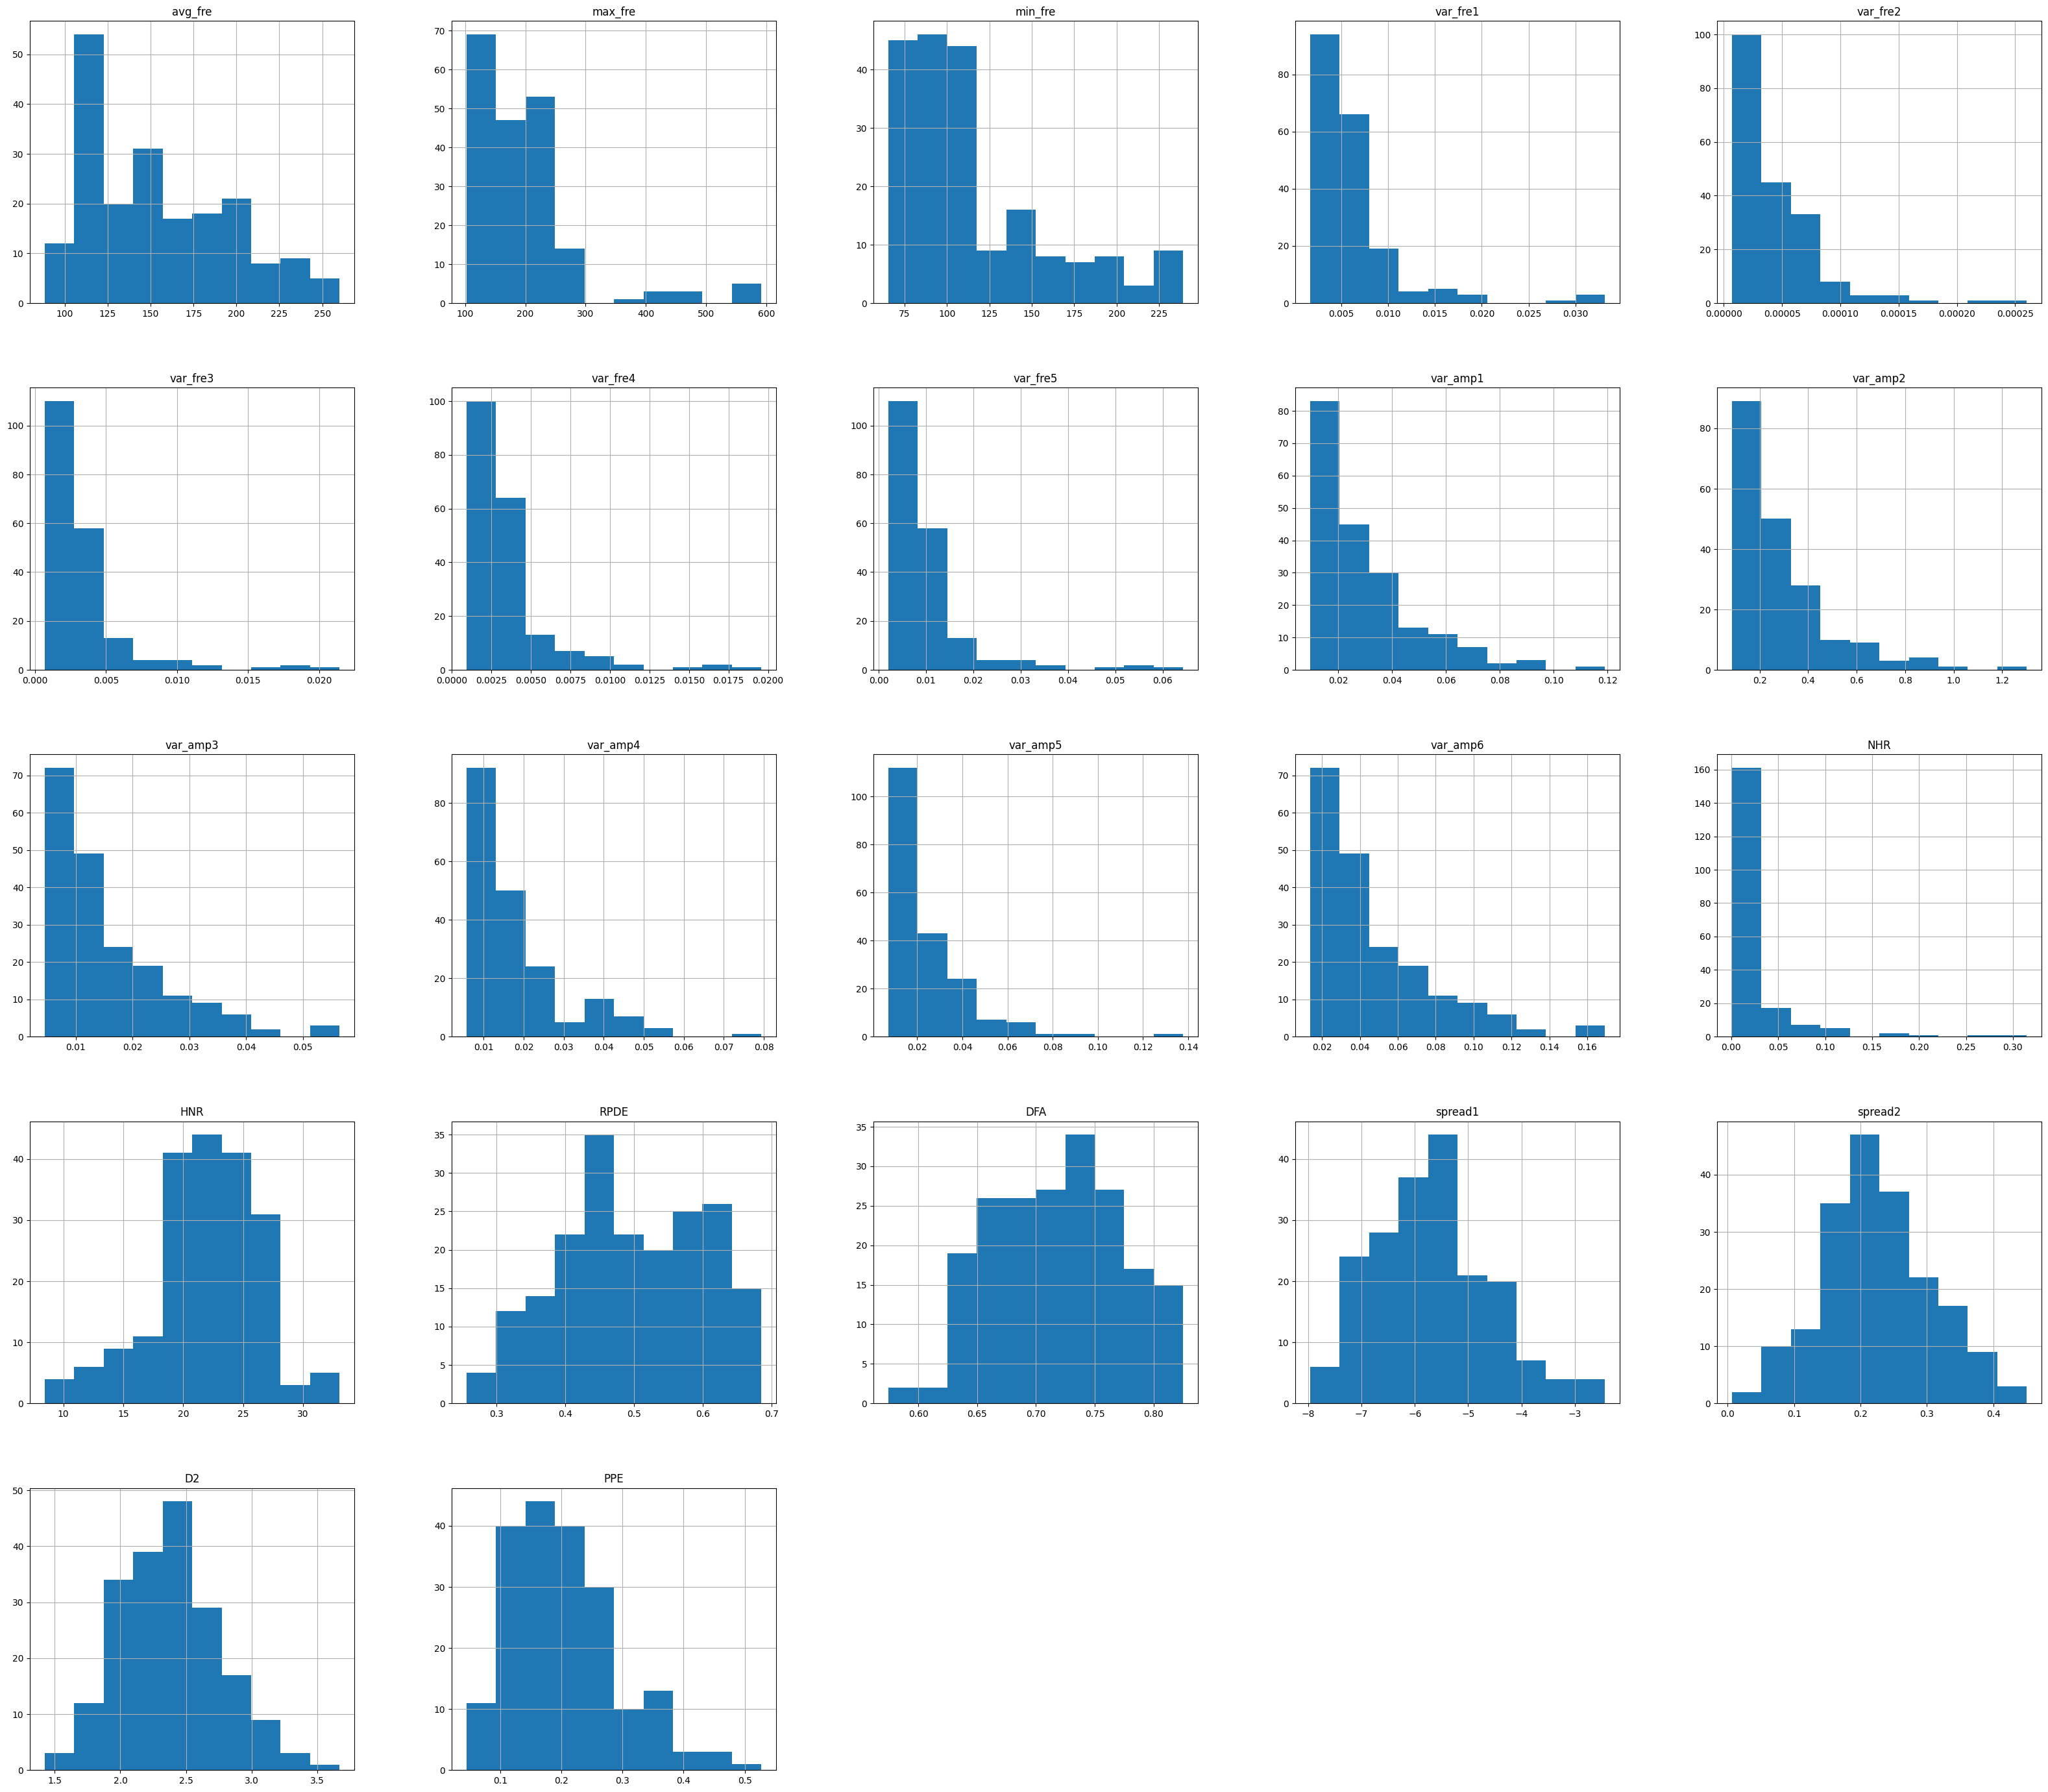

In [12]:
x1.hist(figsize=(40,35))
plt.show()

In [13]:
df=df[df.max_fre<=300]
df=df[df.var_fre1<=0.02]
df=df[df.var_fre2<=0.0001]
df=df[df.var_fre3<=0.01]
df=df[df.var_fre4<=0.01]
df=df[df.var_fre5<=0.02]
df=df[df.var_amp1<=0.10]
df=df[df.var_amp2<=1.0]
df=df[df.var_amp3<=0.04]
df=df[df.var_amp4<=0.050]
df=df[df.var_amp5<=0.075]
df=df[df.var_amp6<=0.125]
df=df[df.NHR<=0.15]

In [14]:
df.skew()

avg_fre     0.608391
max_fre     0.290164
min_fre     1.247241
var_fre1    0.843153
var_fre2    0.756592
var_fre3    0.811867
var_fre4    1.142506
var_fre5    0.811544
var_amp1    1.077428
var_amp2    1.138932
var_amp3    1.128533
var_amp4    1.376069
var_amp5    1.096979
var_amp6    1.128416
NHR         2.635106
HNR        -0.035596
status     -1.057890
RPDE       -0.066659
DFA        -0.132660
spread1     0.283933
spread2     0.158902
D2          0.485240
PPE         0.535763
dtype: float64

<Axes: xlabel='NHR', ylabel='Density'>

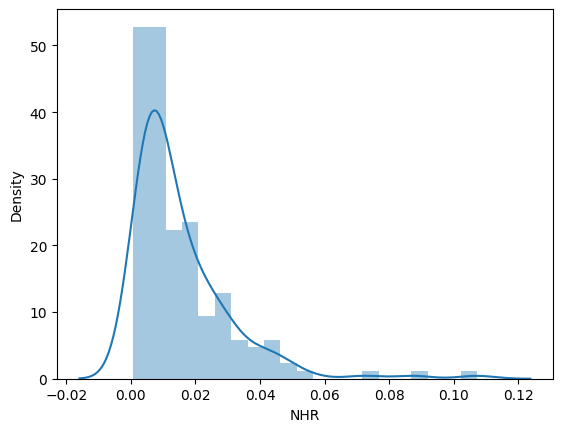

In [15]:
sns.distplot(df['NHR'])

In [16]:
df=df[df.NHR<=0.06]
df.skew()

avg_fre     0.629564
max_fre     0.328258
min_fre     1.245583
var_fre1    0.699469
var_fre2    0.769365
var_fre3    0.813203
var_fre4    1.212263
var_fre5    0.812495
var_amp1    1.063387
var_amp2    1.136743
var_amp3    1.116058
var_amp4    1.381370
var_amp5    1.098219
var_amp6    1.115979
NHR         1.327245
HNR         0.174386
status     -1.064996
RPDE       -0.061493
DFA        -0.133070
spread1     0.298066
spread2     0.123992
D2          0.194425
PPE         0.553609
dtype: float64

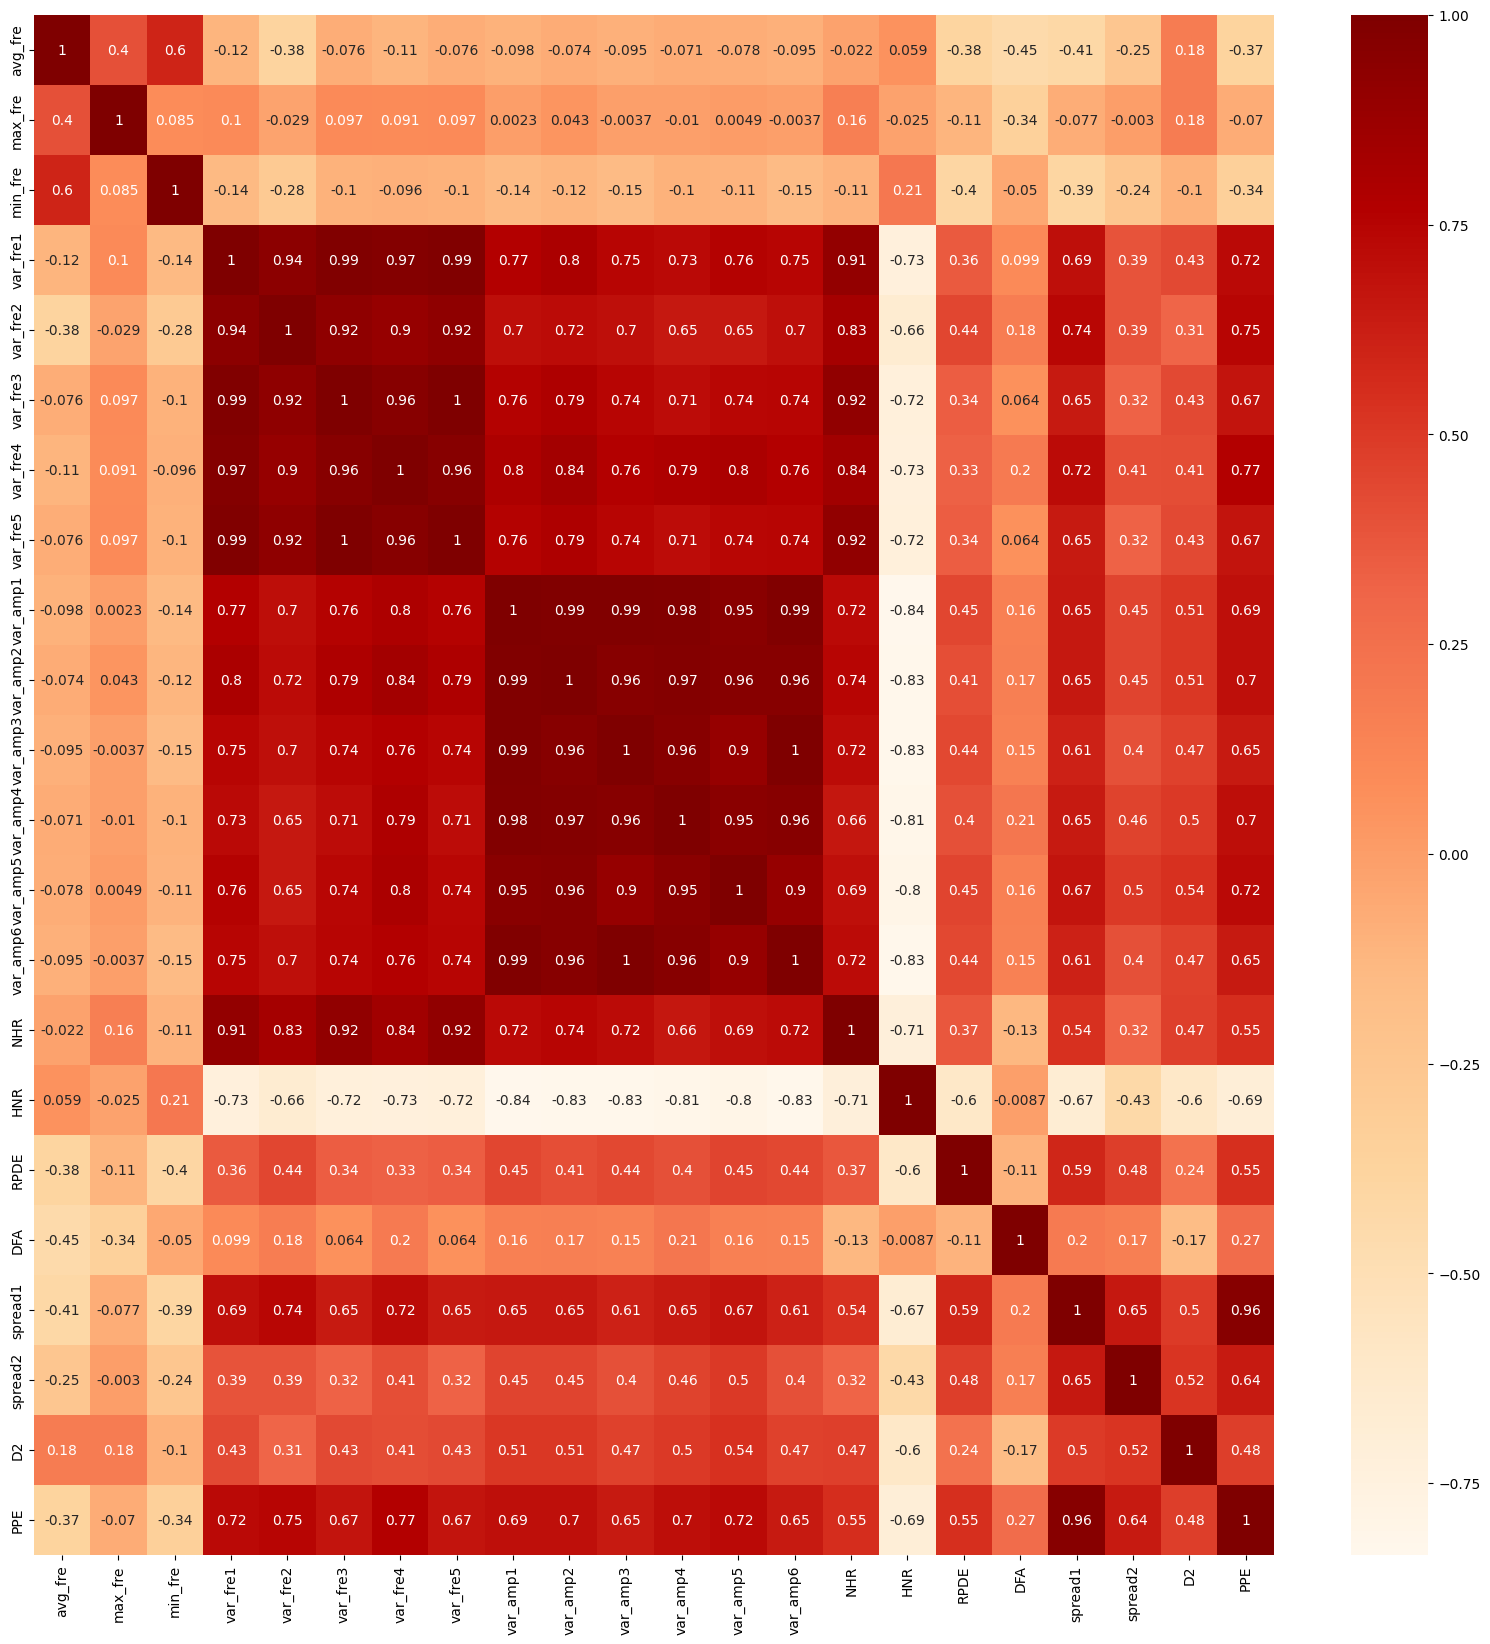

In [17]:
correl=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

In [18]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

In [19]:
#Split the dataset

xtrain,xtest,ytrain,ytest=train_test_split(x1, y1, test_size=0.2)

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Assume you have your data in x and y
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)
rf_predict = rf_model.predict(xtest)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(xtrain, ytrain)
svm_predict = svm_model.predict(xtest)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain, ytrain)
knn_predict = knn_model.predict(xtest)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
dt_predict = dt_model.predict(xtest)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)
lr_predict = lr_model.predict(xtest)

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(xtrain, ytrain)
lgbm_predict = lgbm_model.predict(xtest)

# Evaluate models
models = {
    'Random Forest': rf_predict,
    'Support Vector Machine': svm_predict,
    'K-Nearest Neighbors': knn_predict,
    'Decision Tree': dt_predict,
    'Logistic Regression': lr_predict,
    'LightGBM': lgbm_predict,
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(ytest, predictions)
    report = classification_report(ytest, predictions)
    print(f"\n{model_name}:\nAccuracy: {accuracy}\nClassification Report:\n{report}")



Random Forest:
Accuracy: 0.9487179487179487
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Support Vector Machine:
Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39


K-Nearest Neighbors:
Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1      

In [23]:
import pickle
import os

# Combine predictions using majority voting
ensemble_predictions = np.vstack([rf_predict, svm_predict, knn_predict, dt_predict, lr_predict, lgbm_predict])
majority_votes = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=ensemble_predictions)

# Evaluate ensemble model
ensemble_accuracy = accuracy_score(ytest, majority_votes)
ensemble_report = classification_report(ytest, majority_votes)
print(f"\nEnsemble Model:\nAccuracy: {ensemble_accuracy}\nClassification Report:\n{ensemble_report}")

# Save the ensemble model in Kaggle's working directory
output_path = '/kaggle/working/model.joblib'
with open(output_path, 'wb') as model_file:
    pickle.dump({
        'Random Forest': rf_model,
        'Support Vector Machine': svm_model,
        'K-Nearest Neighbors': knn_model,
        'Decision Tree': dt_model,
        'Logistic Regression': lr_model,
        'LightGBM': lgbm_model,
        'Ensemble Model': majority_votes
    }, model_file)

print(f"Ensemble model saved at: {output_path}")



Ensemble Model:
Accuracy: 0.9487179487179487
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Ensemble model saved at: /kaggle/working/model.pkl


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths for training and testing data
train_data_dir = 'Data/train/'
test_data_dir = 'Data/test/'

# Image data generators for training and testing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for testing data
)
